#### Dependencies
____

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils  import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping



%matplotlib inline

sns.set_style("whitegrid")

#### Load Data
_____

In [4]:
master = pd.read_csv('../resources/cancer_classification.csv')

master.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
master.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Data Analysis
_____

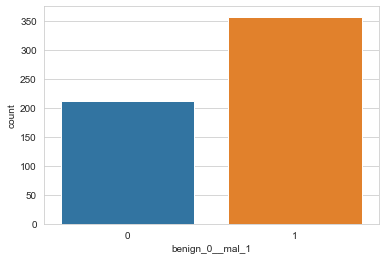

In [9]:
sns.countplot(x='benign_0__mal_1', data=master);

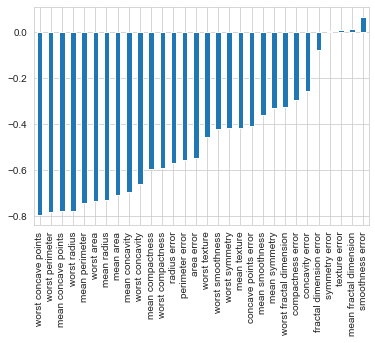

In [15]:
master.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

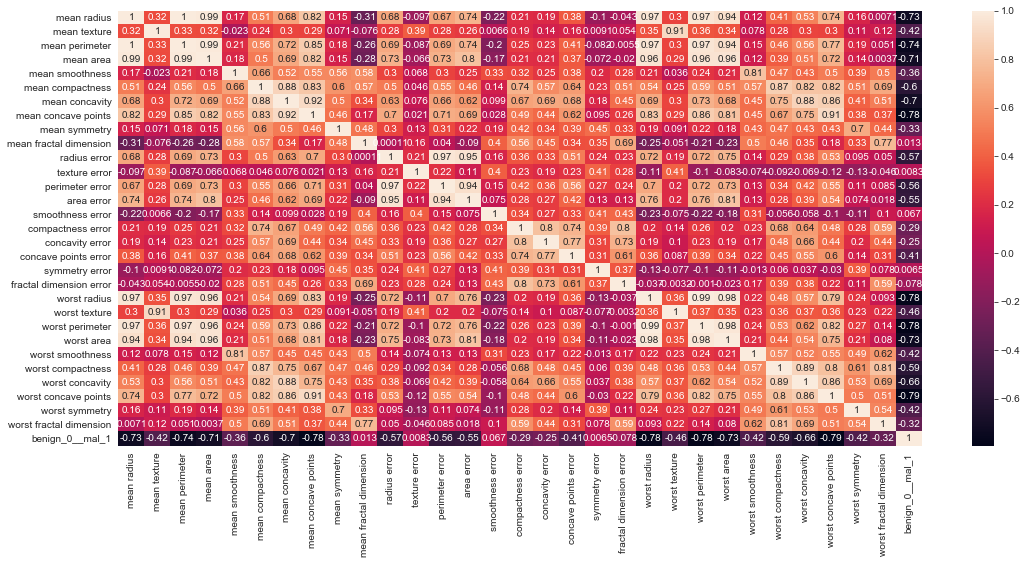

In [22]:
plt.figure(figsize=(18,8))
sns.heatmap(master.corr(),annot=True);

#### Split Train and Test Data
________

In [24]:
X = master.drop('benign_0__mal_1', axis=1).values    # NumPy array (TF requirement)
y = master['benign_0__mal_1'].values                 # NumPy array (TF requirement)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
print(f'X_train shape : {X_train.shape} - Y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape} - Y_test shape : {y_test.shape}')

X_train shape : (398, 30) - Y_train shape : (398,)
X_test shape : (171, 30) - Y_test shape : (171,)


#### Scale & Normalize Training Features
____

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Create Model
____

In [58]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

#output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))    

model.compile(optimizer='adam', loss='binary_crossentropy')   # classification

In [59]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 1ms/sample - loss: 0.6915 - val_loss: 0.6753
Epoch 2/600
398/398 [==============================] - 0s 106us/sample - loss: 0.6619 - val_loss: 0.6487
Epoch 3/600
398/398 [==============================] - 0s 93us/sample - loss: 0.6352 - val_loss: 0.6250
Epoch 4/600
398/398 [==============================] - 0s 93us/sample - loss: 0.6088 - val_loss: 0.5974
Epoch 5/600
398/398 [==============================] - 0s 98us/sample - loss: 0.5768 - val_loss: 0.5641
Epoch 6/600
398/398 [==============================] - 0s 90us/sample - loss: 0.5416 - val_loss: 0.5290
Epoch 7/600
398/398 [==============================] - 0s 88us/sample - loss: 0.5041 - val_loss: 0.4908
Epoch 8/600
398/398 [==============================] - 0s 83us/sample - loss: 0.4639 - val_loss: 0.4513
Epoch 9/600
398/398 [==============================] - 0s 93us/sample - loss: 0.4228 - val_loss: 0.4147
Epoch 10/600
398/3

#### Loss Validation
_____

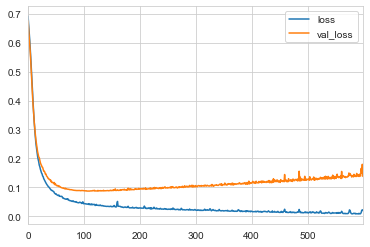

In [60]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

#### EarlyStop Method
____

In [61]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

#output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))    

model.compile(optimizer='adam', loss='binary_crossentropy')   # classification

In [62]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 977us/sample - loss: 0.6713 - val_loss: 0.6583
Epoch 2/600
398/398 [==============================] - 0s 106us/sample - loss: 0.6401 - val_loss: 0.6291
Epoch 3/600
398/398 [==============================] - 0s 95us/sample - loss: 0.6064 - val_loss: 0.5959
Epoch 4/600
398/398 [==============================] - 0s 108us/sample - loss: 0.5690 - val_loss: 0.5614
Epoch 5/600
398/398 [==============================] - 0s 90us/sample - loss: 0.5333 - val_loss: 0.5263
Epoch 6/600
398/398 [==============================] - 0s 90us/sample - loss: 0.4953 - val_loss: 0.4896
Epoch 7/600
398/398 [==============================] - 0s 88us/sample - loss: 0.4544 - val_loss: 0.4519
Epoch 8/600
398/398 [==============================] - 0s 90us/sample - loss: 0.4161 - val_loss: 0.4168
Epoch 9/600
398/398 [==============================] - 0s 90us/sample - loss: 0.3845 - val_loss: 0.3850
Epoch 10/600
39

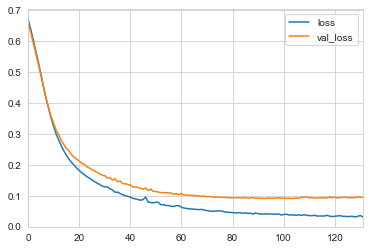

In [63]:
pd.DataFrame(model.history.history).plot();

#### Dropout Method
____

In [64]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

#output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))    

model.compile(optimizer='adam', loss='binary_crossentropy')   # classification

In [65]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 1ms/sample - loss: 0.6968 - val_loss: 0.6721
Epoch 2/600
398/398 [==============================] - 0s 108us/sample - loss: 0.6785 - val_loss: 0.6623
Epoch 3/600
398/398 [==============================] - 0s 98us/sample - loss: 0.6741 - val_loss: 0.6506
Epoch 4/600
398/398 [==============================] - 0s 101us/sample - loss: 0.6534 - val_loss: 0.6378
Epoch 5/600
398/398 [==============================] - 0s 93us/sample - loss: 0.6551 - val_loss: 0.6219
Epoch 6/600
398/398 [==============================] - 0s 98us/sample - loss: 0.6349 - val_loss: 0.6052
Epoch 7/600
398/398 [==============================] - 0s 90us/sample - loss: 0.6120 - val_loss: 0.5800
Epoch 8/600
398/398 [==============================] - 0s 103us/sample - loss: 0.5971 - val_loss: 0.5523
Epoch 9/600
398/398 [==============================] - 0s 93us/sample - loss: 0.5825 - val_loss: 0.5299
Epoch 10/600
398

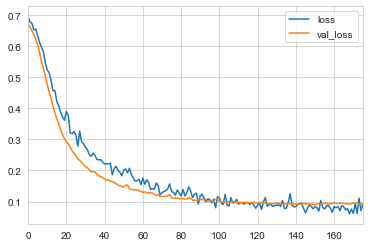

In [66]:
pd.DataFrame(model.history.history).plot();

#### Predictions
____

In [68]:
predictions = model.predict_classes(X_test)

#### Evaluation
___

In [70]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 59   4]
 [  2 106]]
